## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error
import optuna

In [3]:
df1 = pd.read_csv(r"C:\Users\HP\Desktop\Zindi ML projects\AI classes Hackathon 2025\train.csv")
df2 = pd.read_csv(r"C:\Users\HP\Desktop\Zindi ML projects\AI classes Hackathon 2025\test.csv")
df3 = pd.read_csv(r"C:\Users\HP\Desktop\Zindi ML projects\AI classes Hackathon 2025\SampleSubmission.csv")
display("Train",df1.head(),"Test",df2.head(),"Sample Submission",df3.head())

'Train'

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


'Test'

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type
0,DRA59,BABATUNJI010,DRA59_BABATUNJI010,8.270,Normal Sugar,0.214125,Soft Drinks,459.98,2005,NaN,Cluster 3,Grocery Store
1,DRA59,BABATUNJI013,DRA59_BABATUNJI013,8.270,Normal Sugar,0.127821,Soft Drinks,464.98,1994,High,Cluster 3,Supermarket Type1
2,DRB01,BABATUNJI013,DRB01_BABATUNJI013,7.390,Low Sugar,0.082171,Soft Drinks,477.38,1994,High,Cluster 3,Supermarket Type1
3,DRB13,BABATUNJI010,DRB13_BABATUNJI010,6.115,Normal Sugar,0.011791,Soft Drinks,472.63,2005,NaN,Cluster 3,Grocery Store
4,DRB13,BABATUNJI013,DRB13_BABATUNJI013,6.115,Normal Sugar,0.007038,Soft Drinks,473.13,1994,High,Cluster 3,Supermarket Type1


'Sample Submission'

,Item_Store_ID,Item_Store_Returns
0,DRA59_BABATUNJI010,100
1,DRA59_BABATUNJI013,100
2,DRB01_BABATUNJI013,100
3,DRB13_BABATUNJI010,100
4,DRB13_BABATUNJI013,100


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              4990 non-null   object 
 1   Store_ID             4990 non-null   object 
 2   Item_Store_ID        4990 non-null   object 
 3   Item_Weight          4188 non-null   float64
 4   Item_Sugar_Content   4990 non-null   object 
 5   Item_Visibility      4990 non-null   float64
 6   Item_Type            4990 non-null   object 
 7   Item_Price           4990 non-null   float64
 8   Store_Start_Year     4990 non-null   int64  
 9   Store_Size           3540 non-null   object 
 10  Store_Location_Type  4990 non-null   object 
 11  Store_Type           4990 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              3532 non-null   object 
 1   Store_ID             3532 non-null   object 
 2   Item_Store_ID        3532 non-null   object 
 3   Item_Weight          2871 non-null   float64
 4   Item_Sugar_Content   3532 non-null   object 
 5   Item_Visibility      3532 non-null   float64
 6   Item_Type            3532 non-null   object 
 7   Item_Price           3532 non-null   float64
 8   Store_Start_Year     3532 non-null   int64  
 9   Store_Size           2573 non-null   object 
 10  Store_Location_Type  3532 non-null   object 
 11  Store_Type           3532 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 331.3+ KB


In [9]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,4188.0,12.908838,4.703256,4.555,8.767500,12.600000,17.100000,21.350000
Item_Visibility,4990.0,0.066916,0.053058,0.000,0.027273,0.053564,0.095358,0.328391
Item_Price,4990.0,391.803796,119.378259,78.730,307.890000,393.860000,465.067500,667.220000
Store_Start_Year,4990.0,2004.783567,8.283151,1992.000,1994.000000,2006.000000,2011.000000,2016.000000
Item_Store_Returns,4990.0,6103.520164,4447.333835,83.230,2757.660000,5374.675000,8522.240000,32717.410000


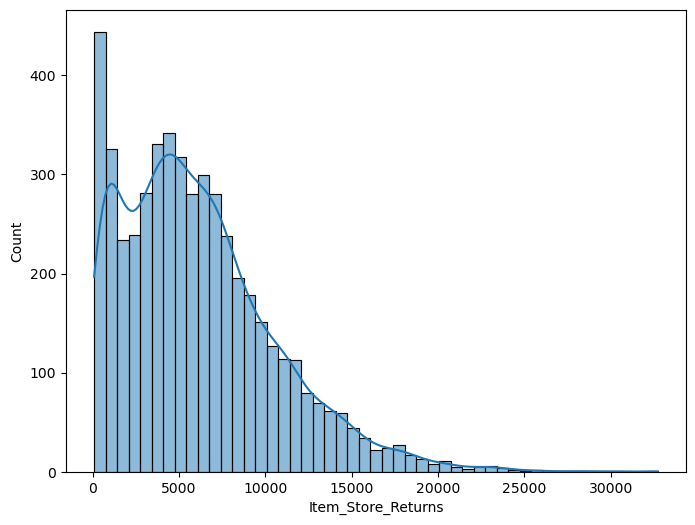

In [11]:
#check target distribution
plt.figure(figsize=(8,6))
sns.histplot(df1["Item_Store_Returns"], kde=True)
plt.xlabel("Item_Store_Returns")
plt.show()

The target feature distribution is right-skewed

The item_store_Returns feature (The profits from items sold in stores) distribution shows the presence of some items with a huge profit.
While such huge profits are possible, it's important also to proceed with caution. One thing i could do is to calculate the average profit of each item in each store and see if these high profits are valid

After inspecting the data, i found out that removing say profit returns higher than 20000-25000 would not make a lot of sense because some products like FDQ19 appears just twice in the data and they had high prices and a very high profit return.

Its either i remove outliers using statistical techniques or try scaling with Robust Scaler to minimize the effect of outliers on the predictive model

I also noticed that some stores usually have a high profit return, Let's take a look

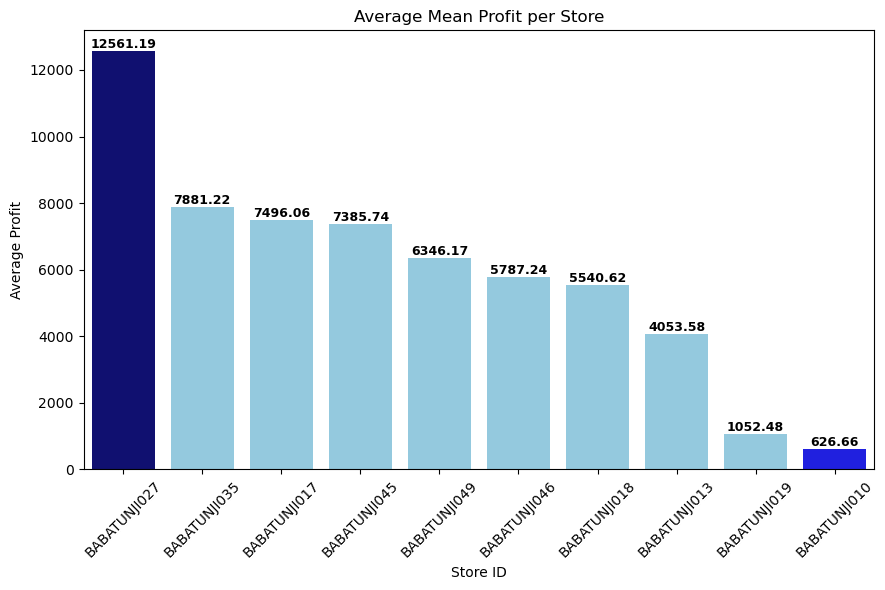

In [15]:
stores = df1.groupby("Store_ID")["Item_Store_Returns"].mean().sort_values(ascending=False)

store_ids = stores.index
profits = stores.values

#index of highest and lowest profits
max_index = profits.argmax()
min_index = profits.argmin()

#Set color palette
colors = ['skyblue'] * len(profits)
colors[max_index] = 'navy'       
colors[min_index] = 'blue'  

plt.figure(figsize=(9,6))
bars = sns.barplot(x=store_ids, y=profits, palette=colors)

#Annotate bar values
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,  # little space above bar
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

plt.xlabel("Store ID")
plt.ylabel("Average Profit")
plt.title("Average Mean Profit per Store")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


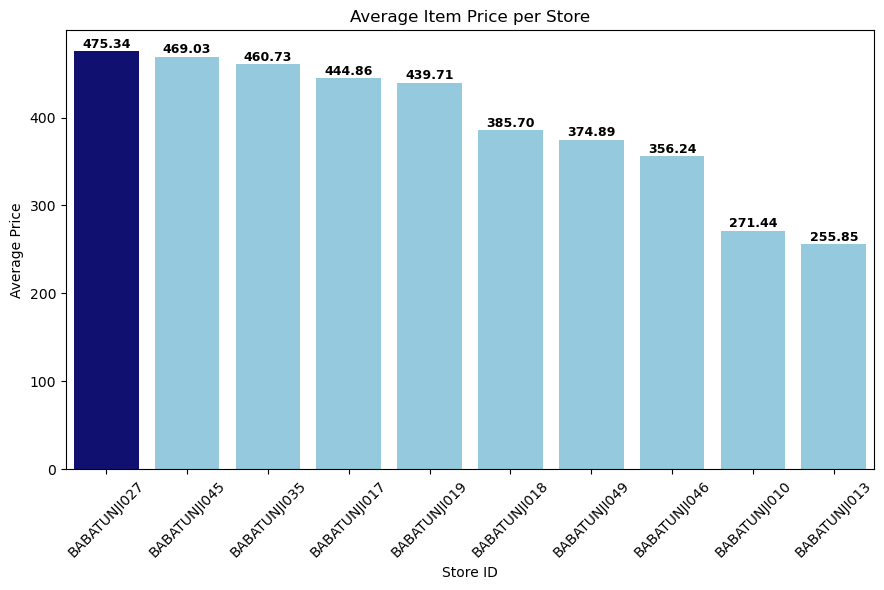

In [17]:
stores_price = df1.groupby("Store_ID")["Item_Price"].mean().sort_values(ascending=False)

store_price_ids = stores_price.index
pfts = stores_price.values

#index of highest and lowest profits
Max_index = pfts.argmax()
Min_index = pfts.argmin()

#Set color palette
Colors = ['skyblue'] * len(pfts)
Colors[Max_index] = 'navy'       
Colors[Min_index] = 'skyblue'  

plt.figure(figsize=(9,6))
bars = sns.barplot(x=store_price_ids, y=pfts, palette=Colors)

#Annotate bar values
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,  # little space above bar
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

plt.xlabel("Store ID")
plt.ylabel("Average Price")
plt.title("Average Item Price per Store")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Average item Profits for each store type')

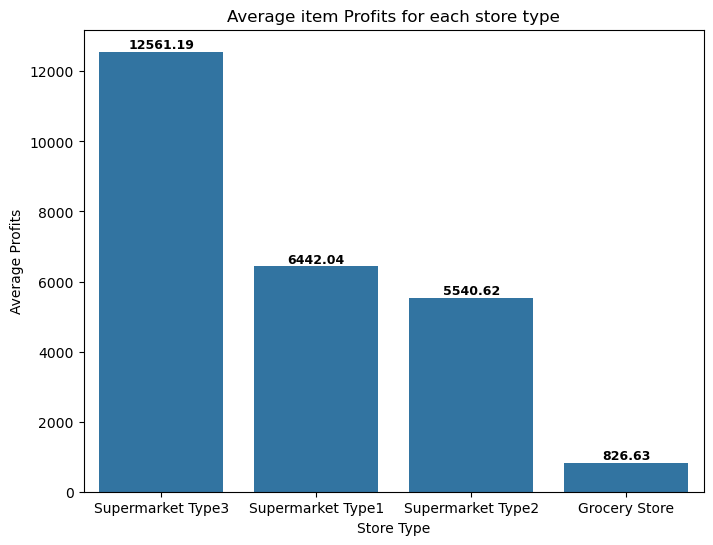

In [19]:
store_type = df1.groupby("Store_Type")["Item_Store_Returns"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,6))
bar_plot = sns.barplot(x=store_type.index, y=store_type.values)
for bar in bar_plot.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,  # little space above bar
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )
plt.xlabel("Store Type")
plt.ylabel("Average Profits")
plt.title("Average item Profits for each store type")

Text(0.5, 1.0, 'Average item Price for each store type')

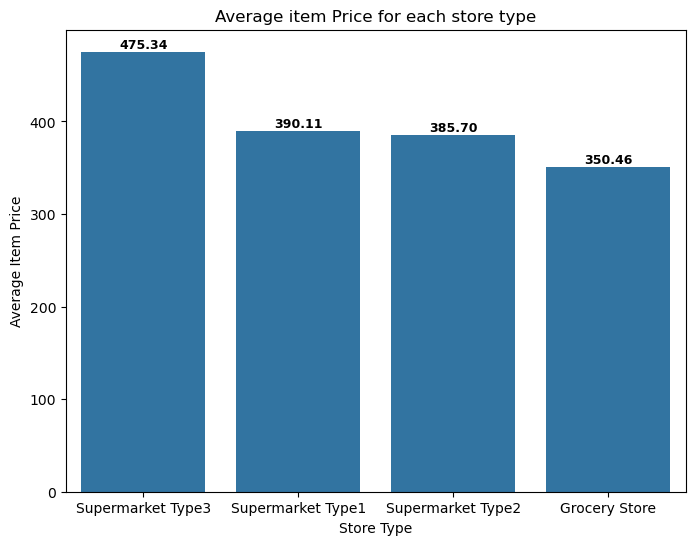

In [21]:
store_type_price = df1.groupby("Store_Type")["Item_Price"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,6))
plot = sns.barplot(x=store_type_price.index, y=store_type_price.values)
for p in plot.patches:
    height = p.get_height()
    plt.text(
        p.get_x() + p.get_width() / 2,
        height + 0.5,  # little space above bar
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )
plt.xlabel("Store Type")
plt.ylabel("Average Item Price")
plt.title("Average item Price for each store type")

Text(0.5, 1.0, 'Average item Profits for each store Location type')

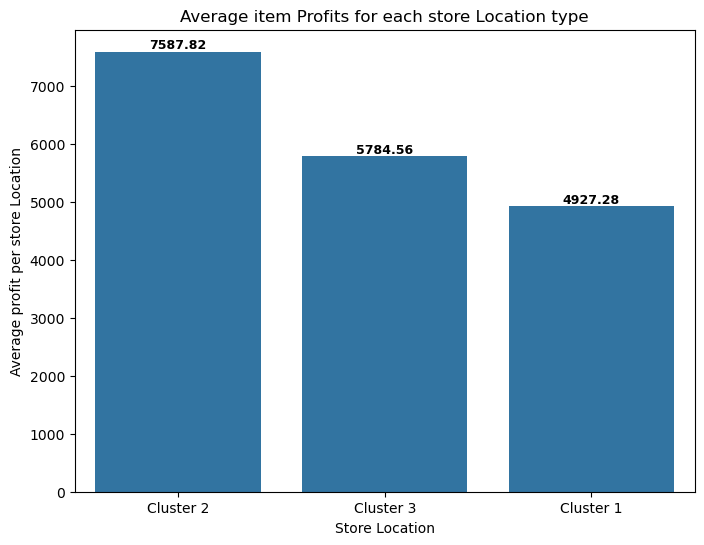

In [23]:
store_loc = df1.groupby("Store_Location_Type")["Item_Store_Returns"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,6))
bar_plot = sns.barplot(y=store_loc.values, x=store_loc.index)
for bar in bar_plot.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,  # little space above bar
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )
plt.ylabel("Average profit per store Location")
plt.xlabel("Store Location")
plt.title("Average item Profits for each store Location type")

Text(0.5, 1.0, 'Average item Prices for each store Location type')

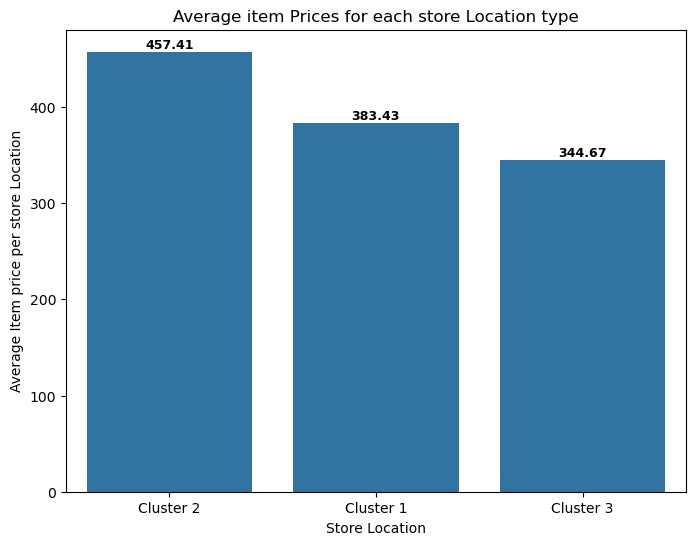

In [25]:
store_loc_price = df1.groupby("Store_Location_Type")["Item_Price"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,6))
bar_plot = sns.barplot(y=store_loc_price.values, x=store_loc_price.index)
for bar in bar_plot.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,  # little space above bar
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )
plt.ylabel("Average Item price per store Location")
plt.xlabel("Store Location")
plt.title("Average item Prices for each store Location type")

Text(0.5, 1.0, 'Average item Profits for each store size')

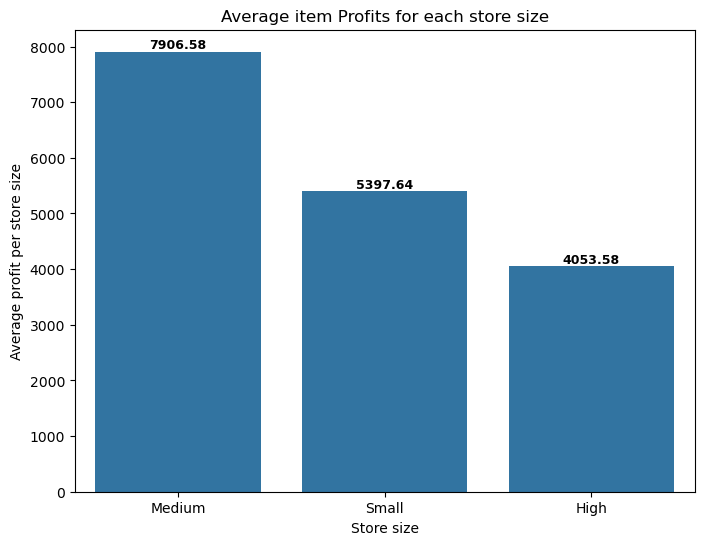

In [27]:
store_size = df1.groupby("Store_Size")["Item_Store_Returns"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,6))
bar_plot = sns.barplot(y=store_size.values, x=store_size.index)
for bar in bar_plot.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,  # little space above bar
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )
plt.ylabel("Average profit per store size")
plt.xlabel("Store size")
plt.title("Average item Profits for each store size")

Text(0.5, 1.0, 'Average item Price for each store size')

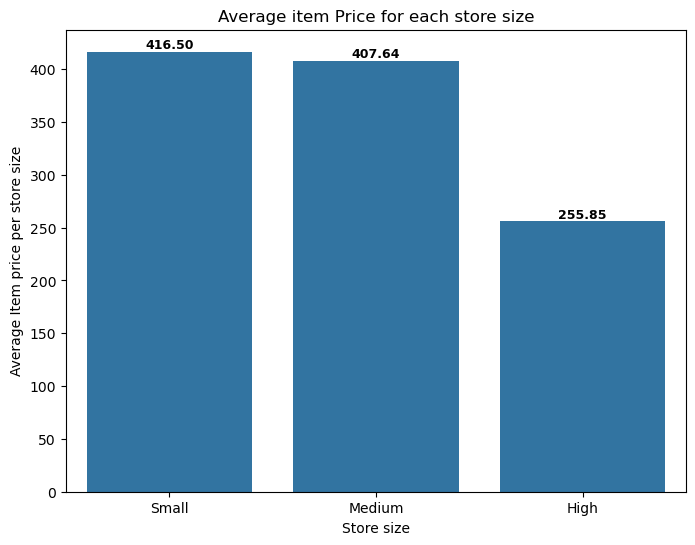

In [29]:
store_size_price = df1.groupby("Store_Size")["Item_Price"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,6))
bar_plot = sns.barplot(y=store_size_price.values, x=store_size_price.index)
for bar in bar_plot.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,  # little space above bar
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )
plt.ylabel("Average Item price per store size")
plt.xlabel("Store size")
plt.title("Average item Price for each store size")

Text(0.5, 1.0, 'Average item Profits per sugar level')

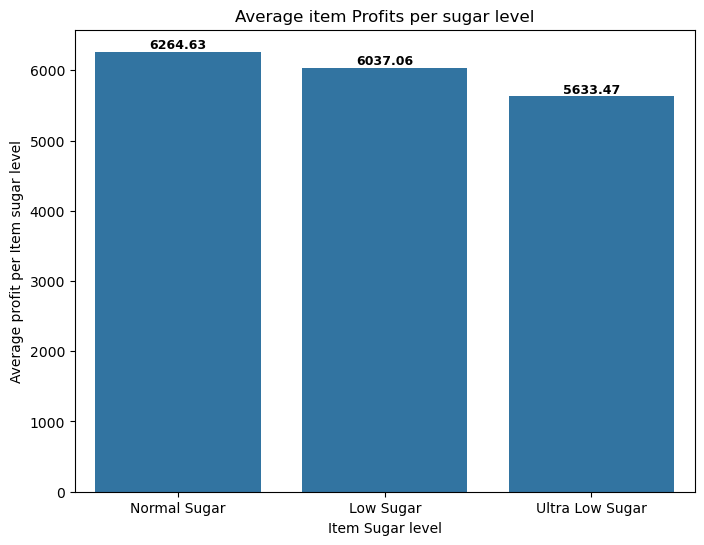

In [31]:
sugar_content = df1.groupby("Item_Sugar_Content")["Item_Store_Returns"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,6))
bar_plot = sns.barplot(y=sugar_content.values, x=sugar_content.index)
for bar in bar_plot.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,  # little space above bar
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )
plt.ylabel("Average profit per Item sugar level")
plt.xlabel("Item Sugar level")
plt.title("Average item Profits per sugar level")

Text(0.5, 1.0, 'Average item Price per sugar level')

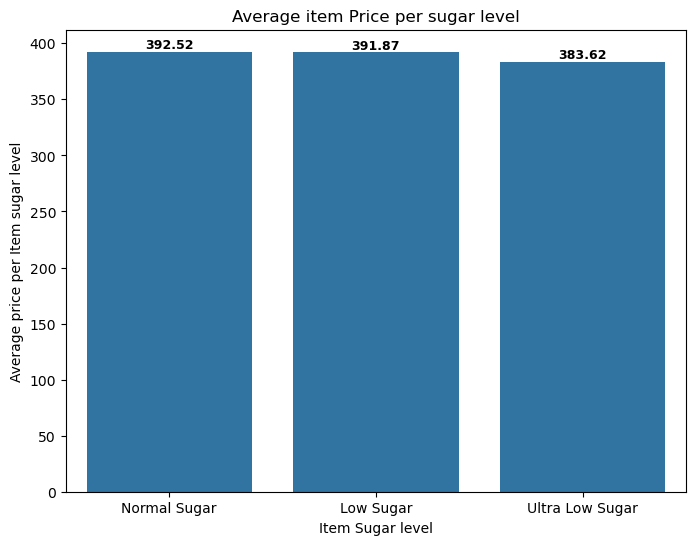

In [33]:
sugar_content_price = df1.groupby("Item_Sugar_Content")["Item_Price"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,6))
bar_plot = sns.barplot(y=sugar_content_price.values, x=sugar_content_price.index)
for bar in bar_plot.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,  # little space above bar
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )
plt.ylabel("Average price per Item sugar level")
plt.xlabel("Item Sugar level")
plt.title("Average item Price per sugar level")

In summary, these plots above shows us that the average price and profits differs based on the location of the store, the size, the store type, items sugar level, and the individual store itself. These insights can guide us to better preprocess our data, e.g encoding some of the categorical features with the average item price instead of normal label or one-hot encoding

In [36]:
#check for duplicates
df1.duplicated().any()

False

In [38]:
df1.nunique()

Item_ID                1451
Store_ID                 10
Item_Store_ID          4990
Item_Weight             399
Item_Sugar_Content        3
Item_Visibility        4638
Item_Type                16
Item_Price             3522
Store_Start_Year          9
Store_Size                3
Store_Location_Type       3
Store_Type                4
Item_Store_Returns     2686
dtype: int64

## Explore Categorical Features

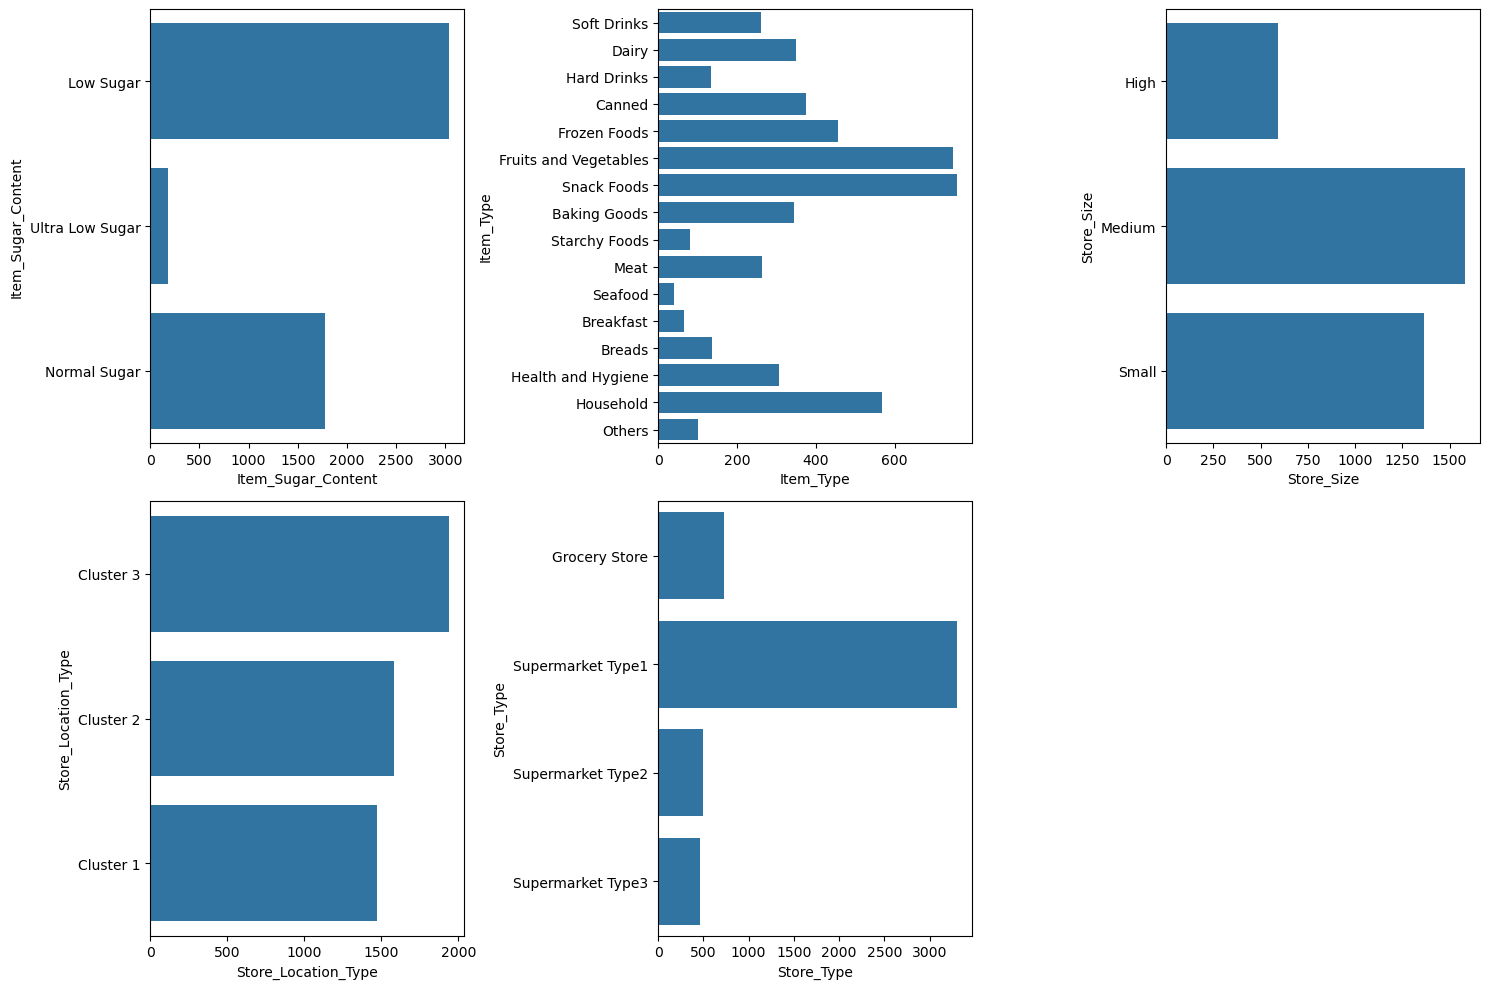

In [41]:
fig, axes = plt.subplots(2,3,figsize=(15,10))

sns.countplot(df1["Item_Sugar_Content"], ax=axes[0,0])
axes[0,0].set_xlabel("Item_Sugar_Content")

sns.countplot(df1["Item_Type"], ax=axes[0,1])
axes[0,1].set_xlabel("Item_Type")

sns.countplot(df1["Store_Size"], ax=axes[0,2])
axes[0,2].set_xlabel("Store_Size")

sns.countplot(df1["Store_Location_Type"], ax=axes[1,0])
axes[1,0].set_xlabel("Store_Location_Type")

sns.countplot(df1["Store_Type"], ax=axes[1,1])
axes[1,1].set_xlabel("Store_Type")

axes[1,2].axis("off")
plt.tight_layout()
plt.show()

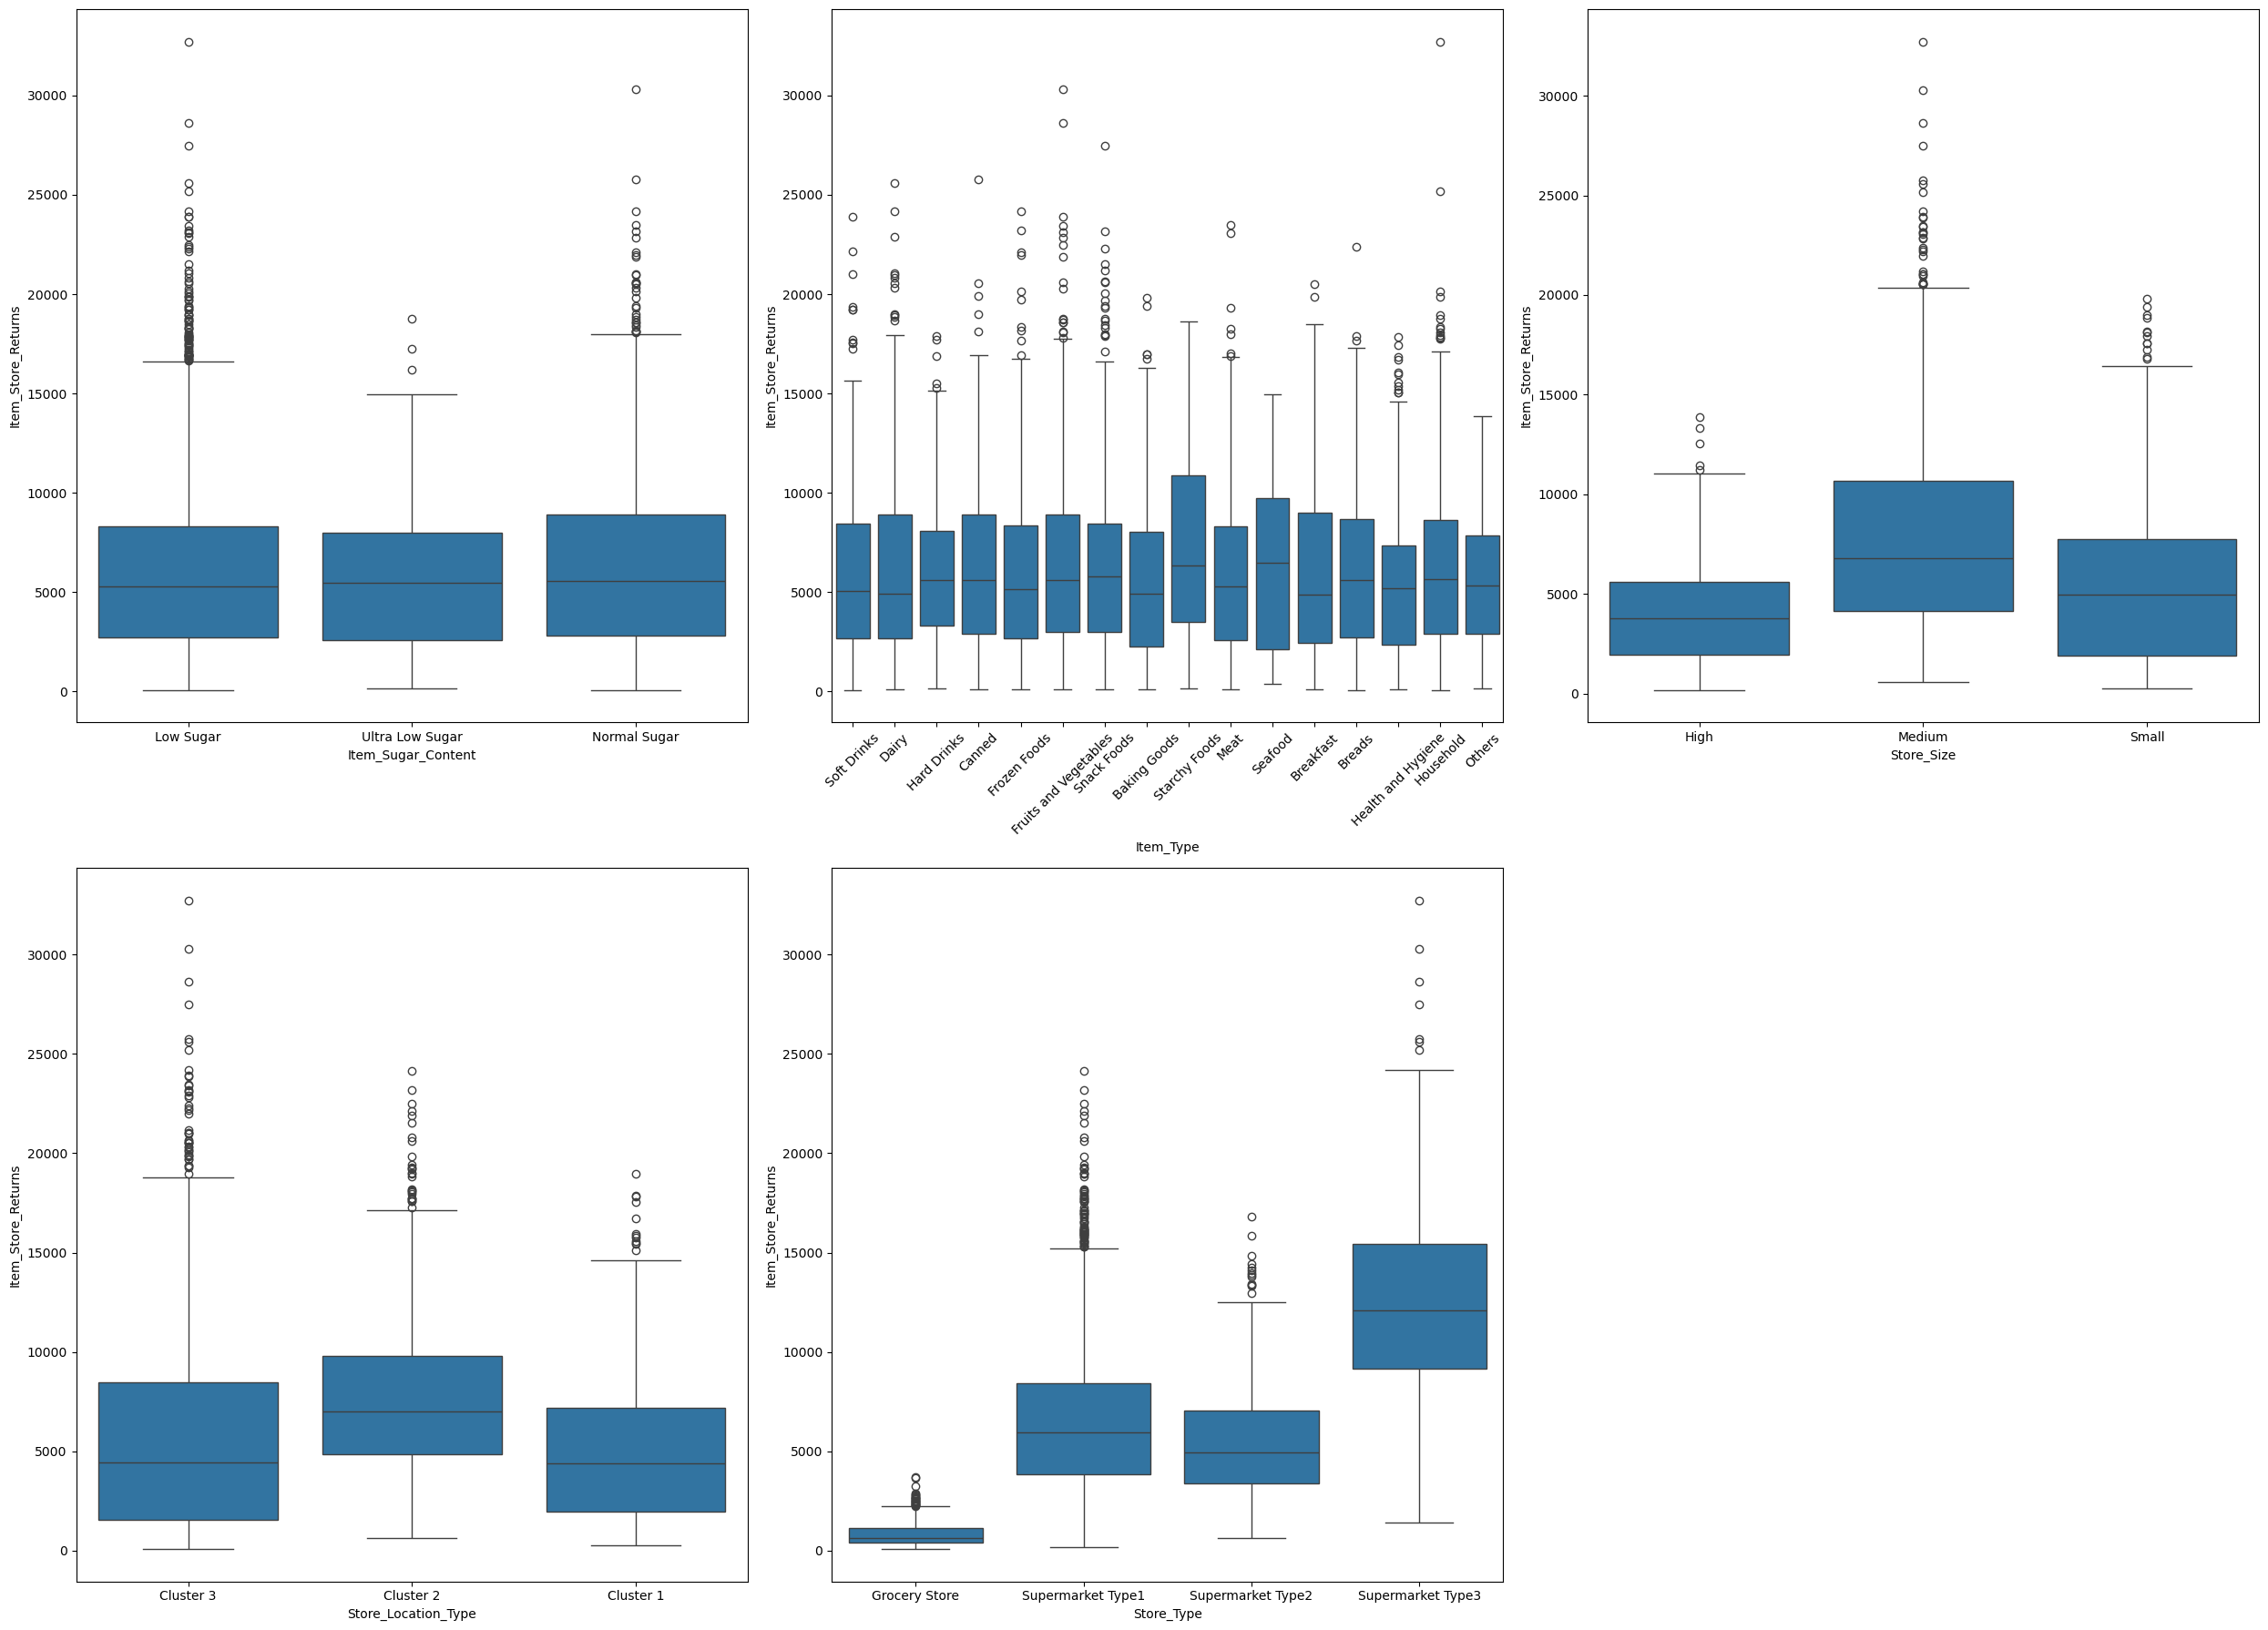

In [42]:
fig, axes = plt.subplots(2,3,figsize=(25,18))

sns.boxplot(data=df1, x="Item_Sugar_Content", y="Item_Store_Returns", ax=axes[0,0])
axes[0,0].set_xlabel("Item_Sugar_Content")
axes[0,0].set_ylabel("Item_Store_Returns")

sns.boxplot(data=df1, x="Item_Type", y="Item_Store_Returns", ax=axes[0,1])
axes[0,1].set_xlabel("Item_Type")
axes[0,1].set_ylabel("Item_Store_Returns")
axes[0,1].tick_params(axis='x', labelrotation=45)


sns.boxplot(data=df1, x="Store_Size", y="Item_Store_Returns", ax=axes[0,2])
axes[0,2].set_xlabel("Store_Size")
axes[0,2].set_ylabel("Item_Store_Returns")

sns.boxplot(data=df1, x="Store_Location_Type", y="Item_Store_Returns", ax=axes[1,0])
axes[1,0].set_xlabel("Store_Location_Type")
axes[1,0].set_ylabel("Item_Store_Returns")

sns.boxplot(data=df1, x="Store_Type", y="Item_Store_Returns", ax=axes[1,1])
axes[1,1].set_xlabel("Store_Type")
axes[1,1].set_ylabel("Item_Store_Returns")

axes[1,2].axis("off")
plt.tight_layout()
plt.show()

## Explore continuous Features

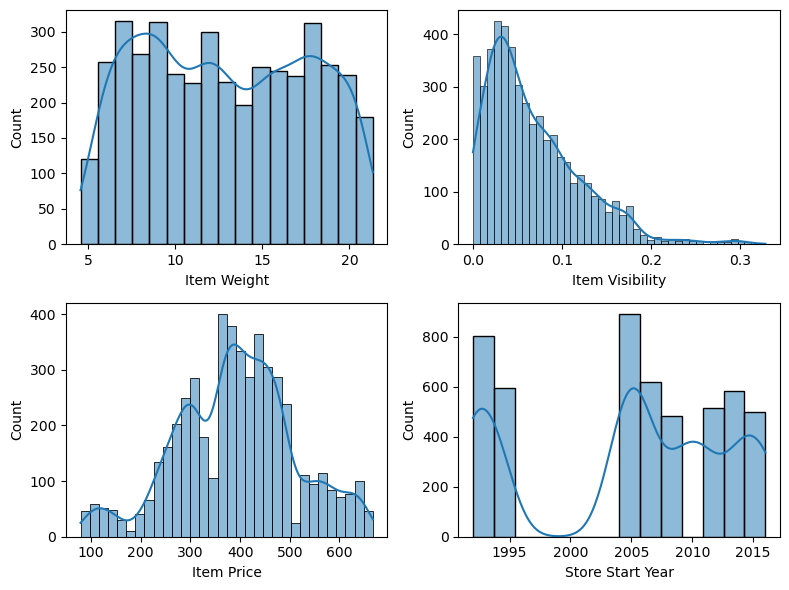

In [46]:
#features distribution plots
fig, axes = plt.subplots(2,2, figsize=(8,6))

sns.histplot(df1["Item_Weight"],kde=True, ax=axes[0,0])
axes[0,0].set_xlabel("Item Weight")

sns.histplot(df1["Item_Visibility"],kde=True, ax=axes[0,1])
axes[0,1].set_xlabel("Item Visibility")

sns.histplot(df1["Item_Price"],kde=True, ax=axes[1,0])
axes[1,0].set_xlabel("Item Price")

sns.histplot(df1["Store_Start_Year"],kde=True, ax=axes[1,1])
axes[1,1].set_xlabel("Store Start Year")

plt.tight_layout()
plt.show()

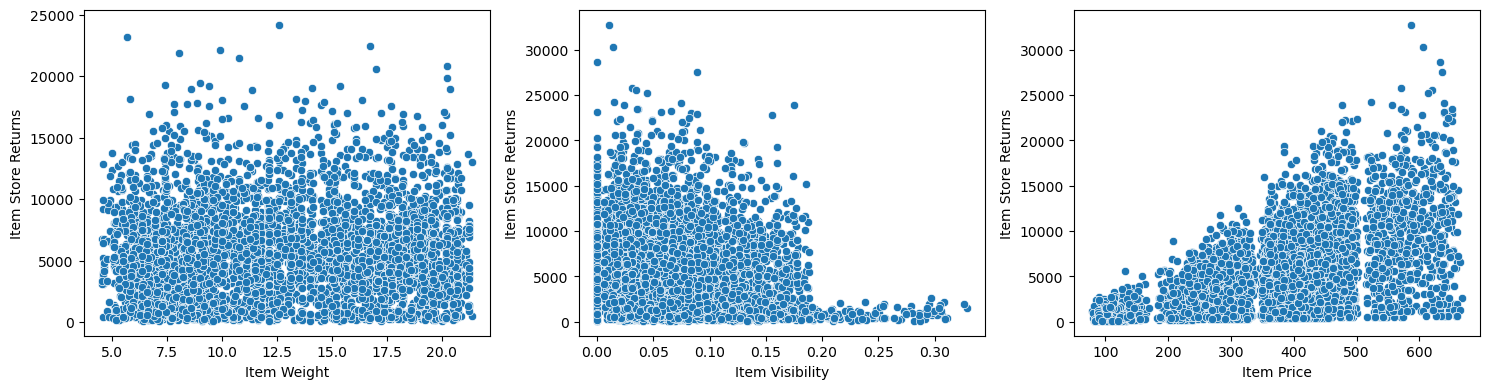

In [48]:
#Visualize the relationships between continuous features and target feature
fig, axes = plt.subplots(1,3, figsize=(15,4))

sns.scatterplot(data=df1, x="Item_Weight", y="Item_Store_Returns", ax=axes[0])
axes[0].set_xlabel("Item Weight")
axes[0].set_ylabel("Item Store Returns")

sns.scatterplot(data=df1, x="Item_Visibility", y="Item_Store_Returns", ax=axes[1])
axes[1].set_xlabel("Item Visibility")
axes[1].set_ylabel("Item Store Returns")

sns.scatterplot(data=df1, x="Item_Price", y="Item_Store_Returns", ax=axes[2])
axes[2].set_xlabel("Item Price")
axes[2].set_ylabel("Item Store Returns")

plt.tight_layout()
plt.show()

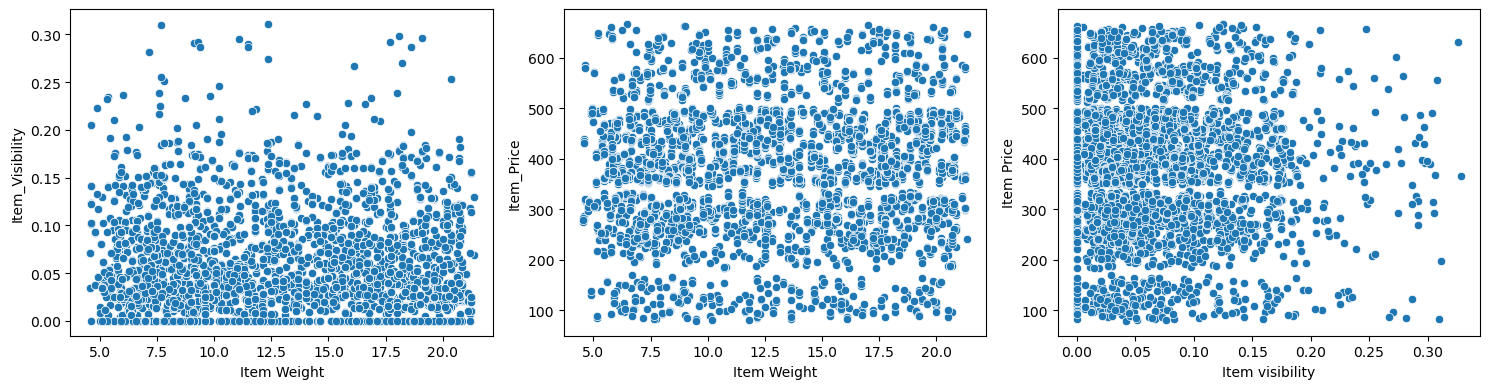

In [50]:
#Lets visualize the relationships between continuous features

fig, axes = plt.subplots(1,3, figsize=(15,4))

sns.scatterplot(data=df1, x="Item_Weight", y="Item_Visibility", ax=axes[0])
axes[0].set_xlabel("Item Weight")
axes[0].set_ylabel("Item_Visibility")

sns.scatterplot(data=df1, x="Item_Weight", y="Item_Price", ax=axes[1])
axes[1].set_xlabel("Item Weight")
axes[1].set_ylabel("Item_Price")

sns.scatterplot(data=df1, x="Item_Visibility", y="Item_Price", ax=axes[2])
axes[2].set_xlabel("Item visibility")
axes[2].set_ylabel("Item Price")

plt.tight_layout()
plt.show()

In [52]:
#check for missing values
missing_values = df1.isnull().sum()
missing_percentage = (missing_values/len(df1)) * 100
missing_data_df = pd.DataFrame({'missing_values': missing_values,'Percentage %': missing_percentage})
missing_data_df = missing_data_df[missing_data_df['missing_values']>0].sort_values(by='Percentage %', ascending=False)
missing_data_df

,missing_values,Percentage %
Store_Size,1450,29.058116
Item_Weight,802,16.072144


### To replace missing values 
The "store size" in the train and test datasets contains missing values. For both dataset, the same 3 stores had their store size unspecified. Therefore
this values will be filled with "Unknown" to specify that their size aren't known.

For item weight, the weght of an item remains the same irrespective of the store. 

In [54]:
#Fill missing values in store_size with unknown
val="Unknown"
df1["Store_Size"] = df1["Store_Size"].fillna(value=val)
df2["Store_Size"] = df1["Store_Size"].fillna(value=val)

In [56]:
#fill missing values in item weight with the mean - Since each unique item has the same weight
df1["Item_Weight"] = df1.groupby("Item_ID")["Item_Weight"].transform(lambda x:x.fillna(x.mean()))
df2["Item_Weight"] = df2.groupby("Item_ID")["Item_Weight"].transform(lambda x:x.fillna(x.mean()))                                                                   

In [58]:
#Some item in the train data didn't have a sample item with its weight but these were found in the test dataset.

item_weight_map = {
    "FDA38": 5.44,
    "FDA55": 17.2,
    "FDB05": 5.155,
    "FDO09": 13.5,
    "FDO11": 8.0,
    "FDP15": 15.2,
    "FDU12": 15.5,
    "FDU43": 19.35,
    "NCG06": 16.35,
    "NCM05": 6.825,
    "NCS06": 7.935,
    "NCU06": 17.6
}
df1["Item_Weight"] = df1["Item_Weight"].fillna(df1["Item_ID"].map(item_weight_map))

In [60]:
item_weight_map2 = {
    "DRD24": 13.85,
    "FDA28": 16.1,
    "FDA35": 14.85,
    "FDA51": 8.05,
    "FDB36": 5.465,
    "FDC37": 15.5,
    "FDD20": 14.15,
    "FDD36": 13.3,
    "FDE10": 6.67,
    "FDE57": 9.6,
    "FDE58": 18.5,
    "FDF29": 15.1,
    "FDF44": 7.17,
    "FDF28": 15.7,
    "FDH26": 19.25,
    "FDH57": 10.895,
    "FDI14": 14.1,
    "FDJ07": 7.26,
    "FDJ10": 5.095,
    "FDJ34": 11.8,
    "FDL02": 20.0,
    "FDL34": 16.0,
    "FDM34": 19.0,
    "FDN15": 17.5,
    "FDN33": 6.305,
    "FDN57": 18.25,
    "FDQ27": 5.19,
    "FDR27": 15.1,
    "FDR44": 6.11,
    "FDS32": 17.75,
    "FDS57": 15.5,
    "FDT09": 15.15,
    "FDT51": 11.65,
    "FDU45": 15.6,
    "FDV20": 20.2,
    "FDV21": 11.5,
    "FDW04": 8.985,
    "FDW08": 12.1,
    "FDW16": 17.35,
    "FDY08": 9.395,
    "FDY47": 8.6,
    "FDZ10": 17.85,
    "FDZ14": 7.71,
    "NCE07": 8.18,
    "NCI29": 8.6,
    "NCL30": 18.1,
    "NCM29": 11.5,
    "NCM54": 17.7,
    "NCN43": 12.15,
    "NCP41": 16.6,
    "NCQ42": 20.35,
    "NCS05": 11.5,
    "NCW17": 18.0,
    "NCW29": 14.0,
    "NCY06": 15.25
}
df2["Item_Weight"] = df2["Item_Weight"].fillna(df2["Item_ID"].map(item_weight_map2))

In [62]:
#Some item do not have the weight specified in both train and test set.
# Items fall under some category, lets fill the missing weight by category

df1["Item_Weight"] = df1.groupby("Item_Type")["Item_Weight"].transform(lambda x:x.fillna(x.mean()))
df2["Item_Weight"] = df2.groupby("Item_Type")["Item_Weight"].transform(lambda x:x.fillna(x.mean()))

### Encode Categorical Features

In [64]:
#Drop Item_ID and Item_store_ID

data1 = df1.drop(["Item_ID","Item_Store_ID"], axis=1)

### Handling Outliers

#### Outlier Detection strategy

> ##### Isolation Forest + Local Outlier Factor

> The idea here is to isolate data points. If it takes many iterations/cuts to isolate a data point, it means that data point is normal and fits well with the other data. However, if it takes few cuts to isolate a data points, it means that points is an outlier.
> LOF detects outliers by checking how crowded a point’s neighborhood is. If a point is in a sparse neighborhood, but its neighbors are in dense neighborhoods, that point is considered an outlier

In [66]:
features_only = data1.drop(columns="Item_Store_Returns")
numeric_cols = features_only.select_dtypes(include=["number"]).columns
num_features = features_only[numeric_cols]
#======================Isolation Forest============================================#
iso = IsolationForest(contamination=0.03, random_state=24)
outlier_flags = iso.fit_predict(num_features)
data1["is_outlier"] = outlier_flags
data1_cleaned = data1[data1['is_outlier'] == 1].drop(columns='is_outlier')

#========================Local Outlier Factor=====================================#
feat_only = data1_cleaned.drop(columns="Item_Store_Returns")
num_cols = feat_only.select_dtypes(include=["number"]).columns
num_feat = feat_only[num_cols]
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.03)
data1_cleaned['outlier_lof'] = lof.fit_predict(num_feat)
data1_final = data1_cleaned[data1_cleaned['outlier_lof'] == 1].drop(columns='outlier_lof')
data1_final

,Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,BABATUNJI010,11.60,Low Sugar,0.068535,Soft Drinks,357.54,2005,Unknown,Cluster 3,Grocery Store,709.08
1,BABATUNJI013,11.60,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,BABATUNJI017,11.60,Low Sugar,0.041178,Soft Drinks,350.79,2014,Unknown,Cluster 2,Supermarket Type1,6381.69
3,BABATUNJI018,11.60,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,BABATUNJI035,11.60,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77
...,...,...,...,...,...,...,...,...,...,...,...
4985,BABATUNJI019,14.65,Low Sugar,0.145952,Household,402.39,1992,Small,Cluster 1,Grocery Store,406.14
4986,BABATUNJI027,14.65,Low Sugar,0.082956,Household,410.14,1992,Medium,Cluster 3,Supermarket Type3,13808.69
4987,BABATUNJI045,14.65,Low Sugar,0.083528,Household,406.14,2009,Unknown,Cluster 2,Supermarket Type1,5685.93
4988,BABATUNJI046,14.65,Low Sugar,0.083359,Household,404.89,2004,Small,Cluster 1,Supermarket Type1,11778.00


### Encode Categorical features

In [68]:
Y = data1_final["Item_Store_Returns"]
X = data1_final.drop(columns="Item_Store_Returns")

In [70]:
Train_X, Val_X, Train_Y, Val_Y = train_test_split(X,Y,test_size=0.1,random_state=11)
Train_X.shape, Val_X.shape, Train_Y.shape, Val_Y.shape

((4224, 10), (470, 10), (4224,), (470,))

In [72]:
#.drop(columns="Item_Store_Returns")
#=====================Encoding store ID==================================#
store_price_map = Train_X.groupby("Store_ID")["Item_Price"].mean()
overall_mean = Train_X["Item_Price"].mean()
#Apply to data for training
Train_X["Store_Name"] = Train_X["Store_ID"].map(store_price_map)
#Apply to data for validation
Val_X["Store_Name"] = Val_X["Store_ID"].map(store_price_map)
Val_X["Store_Name"] = Val_X["Store_Name"].fillna(overall_mean)
#Apply to data for test
df2["Store_Name"] = df2["Store_ID"].map(store_price_map)
df2["Store_Name"] = df2["Store_Name"].fillna(overall_mean)

#===================Enoding Store Location==================================#
store_loc_map = Train_X.groupby("Store_Location_Type")["Item_Price"].mean()
#Apply to data for training
Train_X["Store_Location_Type_Enc"] = Train_X["Store_Location_Type"].map(store_loc_map)
#Apply to data for validation
Val_X["Store_Location_Type_Enc"] = Val_X["Store_Location_Type"].map(store_loc_map)
Val_X["Store_Location_Type_Enc"] = Val_X["Store_Location_Type_Enc"].fillna(overall_mean)
#Apply to data for test
df2["Store_Location_Type_Enc"] = df2["Store_Location_Type"].map(store_loc_map)
df2["Store_Location_Type_Enc"] = df2["Store_Location_Type_Enc"].fillna(overall_mean)

#==================Encoding Store Type====================================#

store_type_map = Train_X.groupby("Store_Type")["Item_Price"].mean()
#Apply to data for training
Train_X["Store_Type_Enc"] = Train_X["Store_Type"].map(store_type_map)
#Apply to data for validation
Val_X["Store_Type_Enc"] = Val_X["Store_Type"].map(store_type_map)
Val_X["Store_Type_Enc"] = Val_X["Store_Type_Enc"].fillna(overall_mean)
#Apply to data for test
df2["Store_Type_Enc"] = df2["Store_Type"].map(store_type_map)
df2["Store_Type_Enc"] = df2["Store_Type_Enc"].fillna(overall_mean)

#====================== Ordinal Encoding==================================#

sugar_order = [["Ultra Low Sugar","Low Sugar","Normal Sugar"]]
o_enc = OrdinalEncoder(categories=sugar_order)
Train_X[["Item_Sugar_Content"]] = o_enc.fit_transform(Train_X[["Item_Sugar_Content"]])
Val_X[["Item_Sugar_Content"]] = o_enc.transform(Val_X[["Item_Sugar_Content"]])
df2[["Item_Sugar_Content"]] = o_enc.transform(df2[["Item_Sugar_Content"]])

#================== Encoding Store size=====================================#

size_order = [["Unknown","Small","Medium","High"]]
o_enc_size = OrdinalEncoder(categories=size_order)
Train_X[["Store_Size"]] = o_enc_size.fit_transform(Train_X[["Store_Size"]])
Val_X[["Store_Size"]] = o_enc_size.transform(Val_X[["Store_Size"]])
df2[["Store_Size"]] = o_enc_size.transform(df2[["Store_Size"]])

In [74]:
df2.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Store_Name,Store_Location_Type_Enc,Store_Type_Enc
0,DRA59,BABATUNJI010,DRA59_BABATUNJI010,8.270,2.0,0.214125,Soft Drinks,459.98,2005,0.0,Cluster 3,Grocery Store,286.290314,350.024425,349.231695
1,DRA59,BABATUNJI013,DRA59_BABATUNJI013,8.270,2.0,0.127821,Soft Drinks,464.98,1994,3.0,Cluster 3,Supermarket Type1,260.722930,350.024425,390.418699
2,DRB01,BABATUNJI013,DRB01_BABATUNJI013,7.390,1.0,0.082171,Soft Drinks,477.38,1994,0.0,Cluster 3,Supermarket Type1,260.722930,350.024425,390.418699
3,DRB13,BABATUNJI010,DRB13_BABATUNJI010,6.115,2.0,0.011791,Soft Drinks,472.63,2005,2.0,Cluster 3,Grocery Store,286.290314,350.024425,349.231695
4,DRB13,BABATUNJI013,DRB13_BABATUNJI013,6.115,2.0,0.007038,Soft Drinks,473.13,1994,1.0,Cluster 3,Supermarket Type1,260.722930,350.024425,390.418699


In [76]:
Train_X = Train_X.drop(["Store_ID","Item_Type","Store_Location_Type", "Store_Type"], axis=1)
Val_X = Val_X.drop(["Store_ID","Item_Type","Store_Location_Type", "Store_Type"], axis=1)
df2 = df2.drop(["Item_ID","Item_Store_ID","Store_ID","Item_Type","Store_Location_Type", "Store_Type","Item_ID"], axis=1)
df2.shape

(3532, 9)

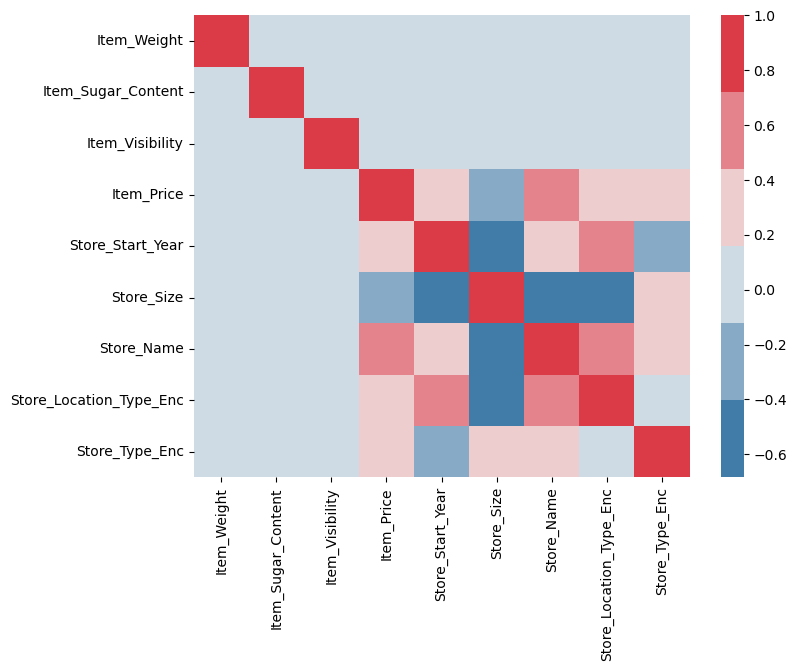

In [78]:
plt.figure(figsize=(8,6))

sns.heatmap(data=Train_X.corr(),annot=False, cbar=True, cmap=sns.diverging_palette(240,10))
plt.show()

In [80]:
#create a copy of the train_data
X_ft = Train_X.copy()
y_tg = Train_Y


# Calculate mutual information
mi_scores = mutual_info_regression(X_ft, y_tg, random_state=80)
mi_scores = pd.Series(mi_scores, index=X_ft.columns)
mi_scores = mi_scores.sort_values(ascending=False)

print(mi_scores)   #base model = 3122.18469

Item_Price                 0.485938
Store_Name                 0.411877
Store_Type_Enc             0.348784
Store_Start_Year           0.318765
Store_Size                 0.106253
Store_Location_Type_Enc    0.091242
Item_Visibility            0.039471
Item_Sugar_Content         0.013792
Item_Weight                0.013658
dtype: float64


In [82]:
def xgb_objective(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 10, 50),#3
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 400, 1000),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1.0, 5.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1.0, 5.0),
        'random_state': trial.suggest_int('random_state', 1, 100)
    }
    boost = xgb.XGBRegressor(**params)
    boost.fit(Train_X,Train_Y)
    preds_Y = boost.predict(Val_X)
    return np.sqrt(mean_squared_error(Val_Y, preds_Y))

In [84]:
# Create the study
xgb_study = optuna.create_study(direction='minimize', study_name="xgb_optimizer")
xgb_study.optimize(xgb_objective, n_trials=100)

print('Best parameters', xgb_study.best_params)
print('Best rmse value', xgb_study.best_value)

[I 2025-06-12 16:16:07,274] A new study created in memory with name: xgb_optimizer
[I 2025-06-12 16:16:37,408] Trial 0 finished with value: 3366.6933468796174 and parameters: {'max_depth': 21, 'learning_rate': 0.04930589996459902, 'n_estimators': 865, 'gamma': 0.5874991897093823, 'reg_alpha': 1.027781784825121, 'reg_lambda': 4.308329431648108, 'random_state': 97}. Best is trial 0 with value: 3366.6933468796174.
[I 2025-06-12 16:17:37,588] Trial 1 finished with value: 3364.1934396430056 and parameters: {'max_depth': 35, 'learning_rate': 0.012385545757360271, 'n_estimators': 873, 'gamma': 0.532285878779366, 'reg_alpha': 3.863798990456647, 'reg_lambda': 3.611611143690199, 'random_state': 65}. Best is trial 1 with value: 3364.1934396430056.
[I 2025-06-12 16:18:24,996] Trial 2 finished with value: 3409.471235913899 and parameters: {'max_depth': 39, 'learning_rate': 0.02368054733530673, 'n_estimators': 761, 'gamma': 0.2973996582737073, 'reg_alpha': 2.42747879429187, 'reg_lambda': 1.413419971

Best parameters {'max_depth': 33, 'learning_rate': 0.011378817466000363, 'n_estimators': 452, 'gamma': 0.6215188514043034, 'reg_alpha': 3.8511514058396212, 'reg_lambda': 4.9884725104180605, 'random_state': 21}
Best rmse value 3231.9694390570594


In [86]:
model = xgb.XGBRegressor(max_depth=33, learning_rate=0.011378817466000363, n_estimators=452, 
                        gamma=0.6215188514043034, reg_alpha=3.8511514058396212, reg_lambda=4.9884725104180605, 
                        random_state=21)
model.fit(Train_X, Train_Y)
predt = model.predict(Val_X)
mse = mean_squared_error(Val_Y, predt)
rmse = np.sqrt(mse)
rmse

3231.9694390570594

In [88]:
test_preds = model.predict(df2)
test_preds

array([ 1753.2782, 12063.916 ,  9897.3545, ...,  7595.8096,   943.2391,
        9284.855 ], dtype=float32)

In [90]:
sub = df3.copy()
sub["Item_Store_Returns"] = test_preds
sub

,Item_Store_ID,Item_Store_Returns
0,DRA59_BABATUNJI010,1753.278198
1,DRA59_BABATUNJI013,12063.916016
2,DRB01_BABATUNJI013,9897.354492
3,DRB13_BABATUNJI010,1254.342163
4,DRB13_BABATUNJI013,6670.211914
...,...,...
3527,NCZ42_BABATUNJI010,1471.191040
3528,NCZ42_BABATUNJI013,8063.306641
3529,NCZ42_BABATUNJI049,7595.809570
3530,NCZ53_BABATUNJI010,943.239075


In [92]:
sub.to_csv("first_sub4.csv", index=False)

In [94]:
def visualize_feature_importance(model, feature_names, top_n=None):

    # Extract feature importances
    importance = model.feature_importances_

    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)

    top_features = importance_df.head(top_n)

    plt.figure(figsize=(10, 6))
    plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Top Feature Importances')
    plt.gca().invert_yaxis()  # Invert y-axis to show the most important at the top
    plt.show()

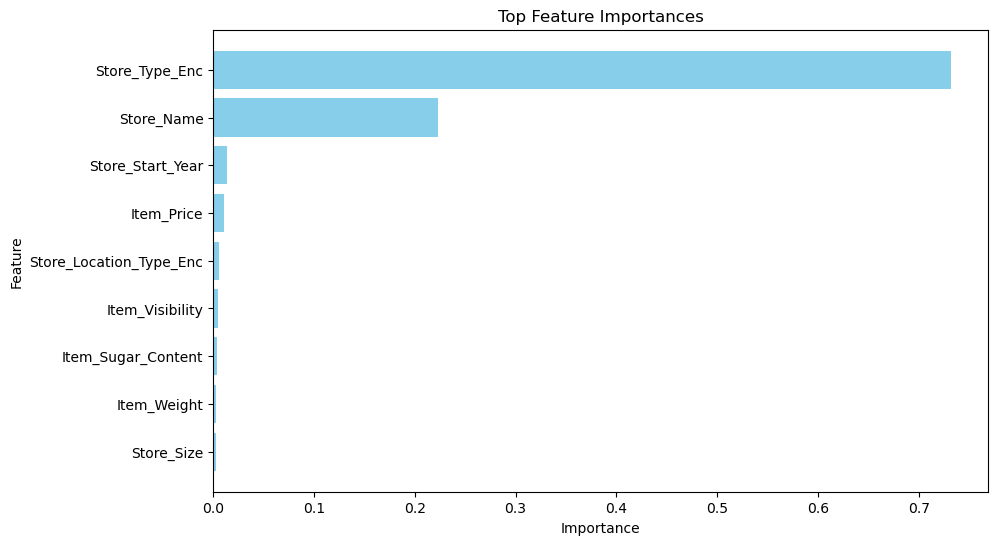

In [96]:
visualize_feature_importance(model,Train_X.columns,15)

In [736]:

#create a copy of the train_data
X_ft = df1_drop.copy()
y_tg = target 


# Calculate mutual information
mi_scores = mutual_info_regression(X_ft, y_tg, random_state=80)
mi_scores = pd.Series(mi_scores, index=X_ft.columns)
mi_scores = mi_scores.sort_values(ascending=False)

print(mi_scores)   #base model = 3122.18469

Item_Price             0.443965
Store_ID               0.082657
Store_Start_Year       0.082428
Store_Size             0.066902
Store_Location_Type    0.066088
Item_Type              0.032096
Item_Visibility        0.021640
Item_Store_ID          0.020065
Item_ID                0.013458
Item_Sugar_Content     0.003488
Store_Type             0.000789
Item_Weight            0.000000
dtype: float64
